In [8]:
%run ../../utils/commonImports.py
%matplotlib inline

In [9]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg\\tree_search.pkl"

# Grid search evaluation

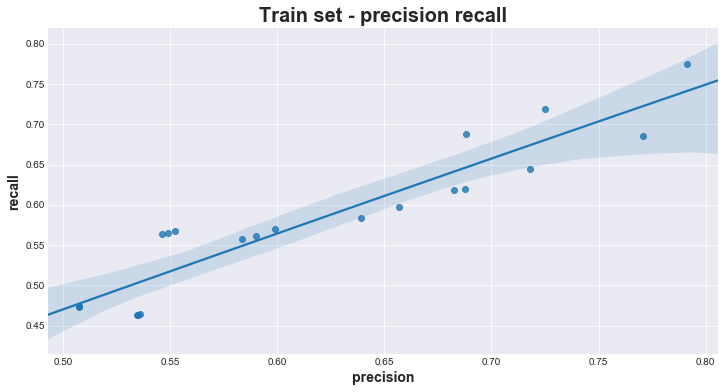

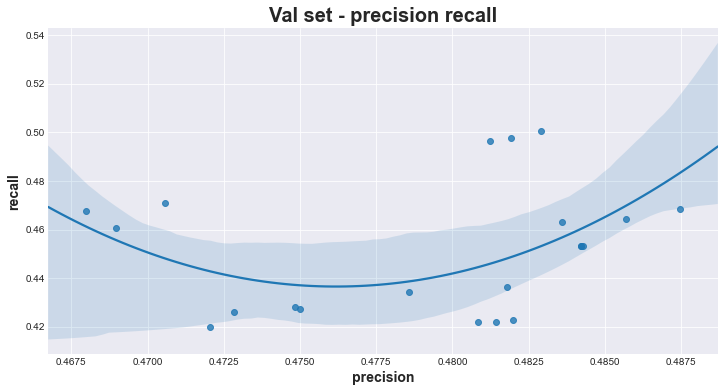

In [10]:
from utils.evaluation import gs_report

grid_search, stats_val = gs_report(data_root, gs_path)

# Model selection

In [11]:
import pandas as pd

class ThresholdModel:
    def __init__(self, clf, threshold_1=0.5):
        self.clf = clf
        self.threshold_1 = threshold_1
        
    def predict(self, X):
        probabs = pd.Series(self.clf.predict_proba(X)[:, 1])
        labels = probabs > self.threshold_1
        return labels.apply(int)

In [12]:
stats_val.sort_values('precision', ascending=False).head(10)

,precision,recall,f1
11,0.4875,0.4685,0.4778
10,0.4857,0.4644,0.4748
2,0.4843,0.4531,0.4682
1,0.4842,0.4535,0.4683
0,0.4842,0.4535,0.4683
9,0.4836,0.4633,0.4732
8,0.4829,0.5005,0.4915
5,0.4820,0.4229,0.4505
7,0.4819,0.4978,0.4897
14,0.4818,0.4365,0.4581


In [13]:
from utils.evaluation import clf_report

clf = grid_search.clfs[35]
threshold_model = ThresholdModel(clf, 0.6)
clf = threshold_model
clf_report(clf, data_root)

IndexError: list index out of range

# Look at probabilities

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\02-sg-filter')

In [ ]:
threshold_model = ThresholdModel(clf, 0.6)

In [ ]:
threshold_model.predict(X_train)

C:\Anaconda3\envs\crypto36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


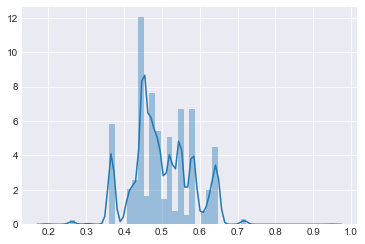

In [22]:
sns.distplot(probabs_train)